## TO DO: 25.02.28 - 머신러닝 모델 성능 평가

In [4]:
from IPython.display import Image  # for showing image file

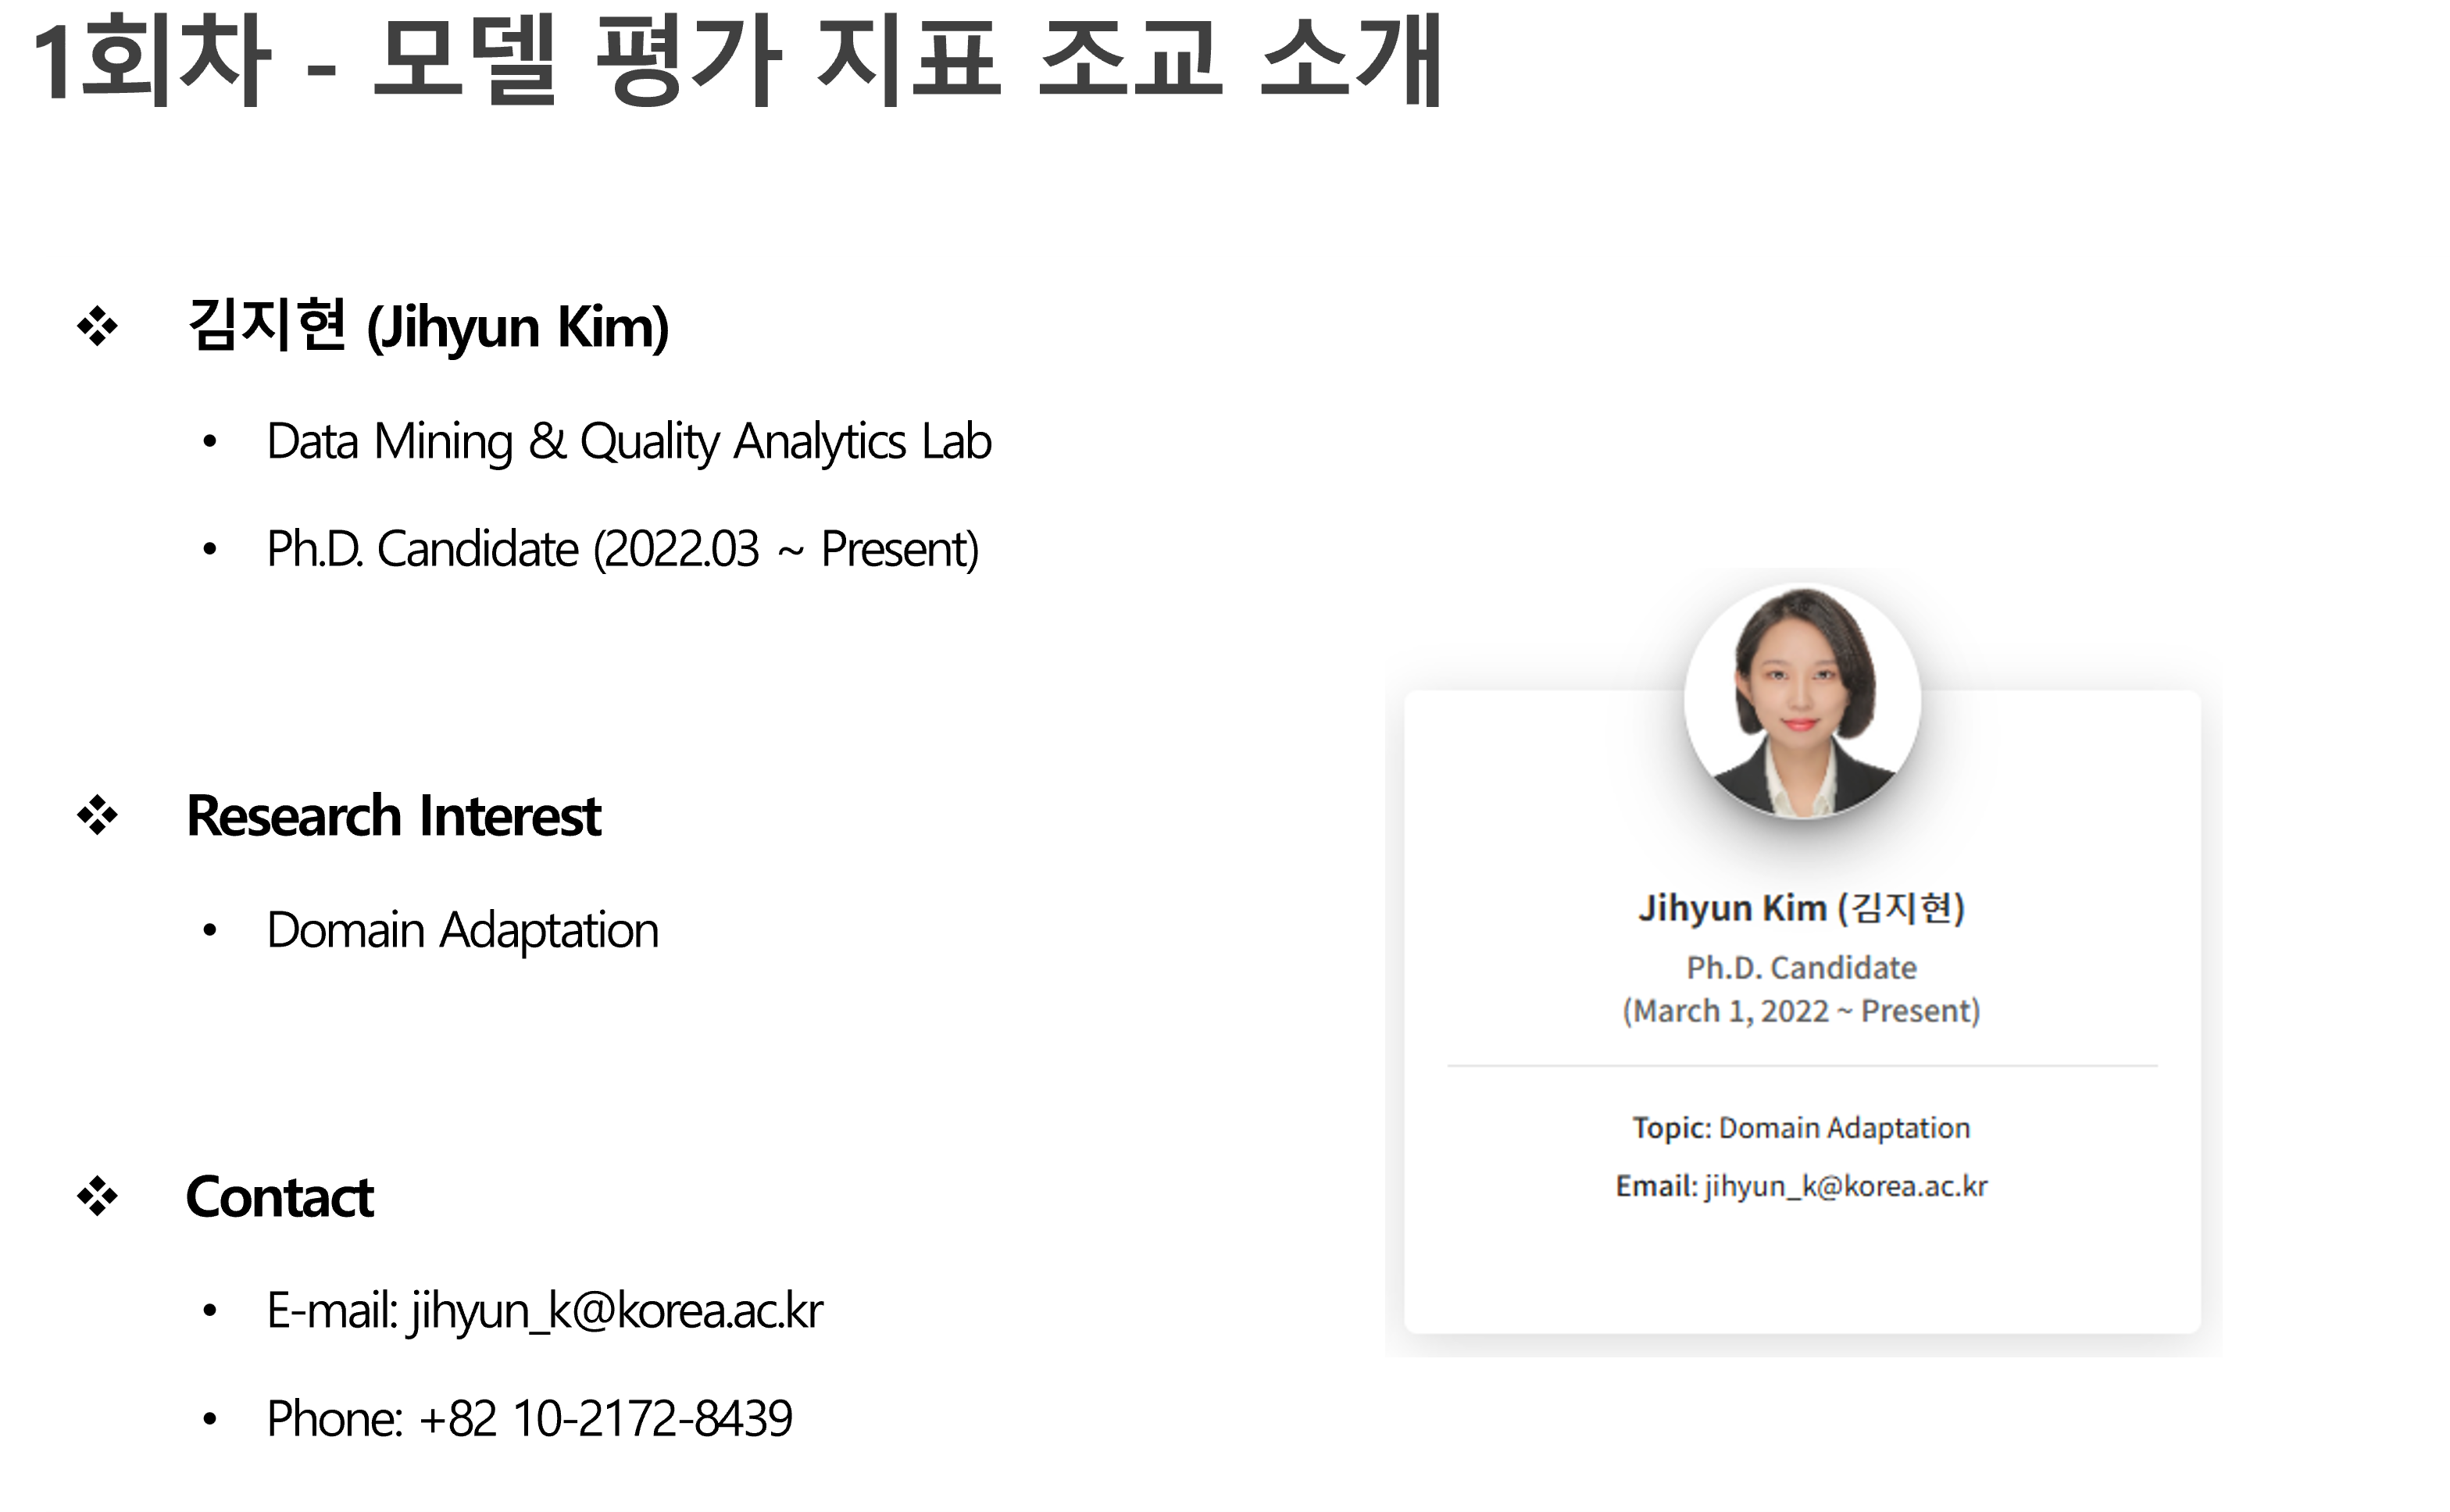

In [2]:
Image('./images/jihyun.png')

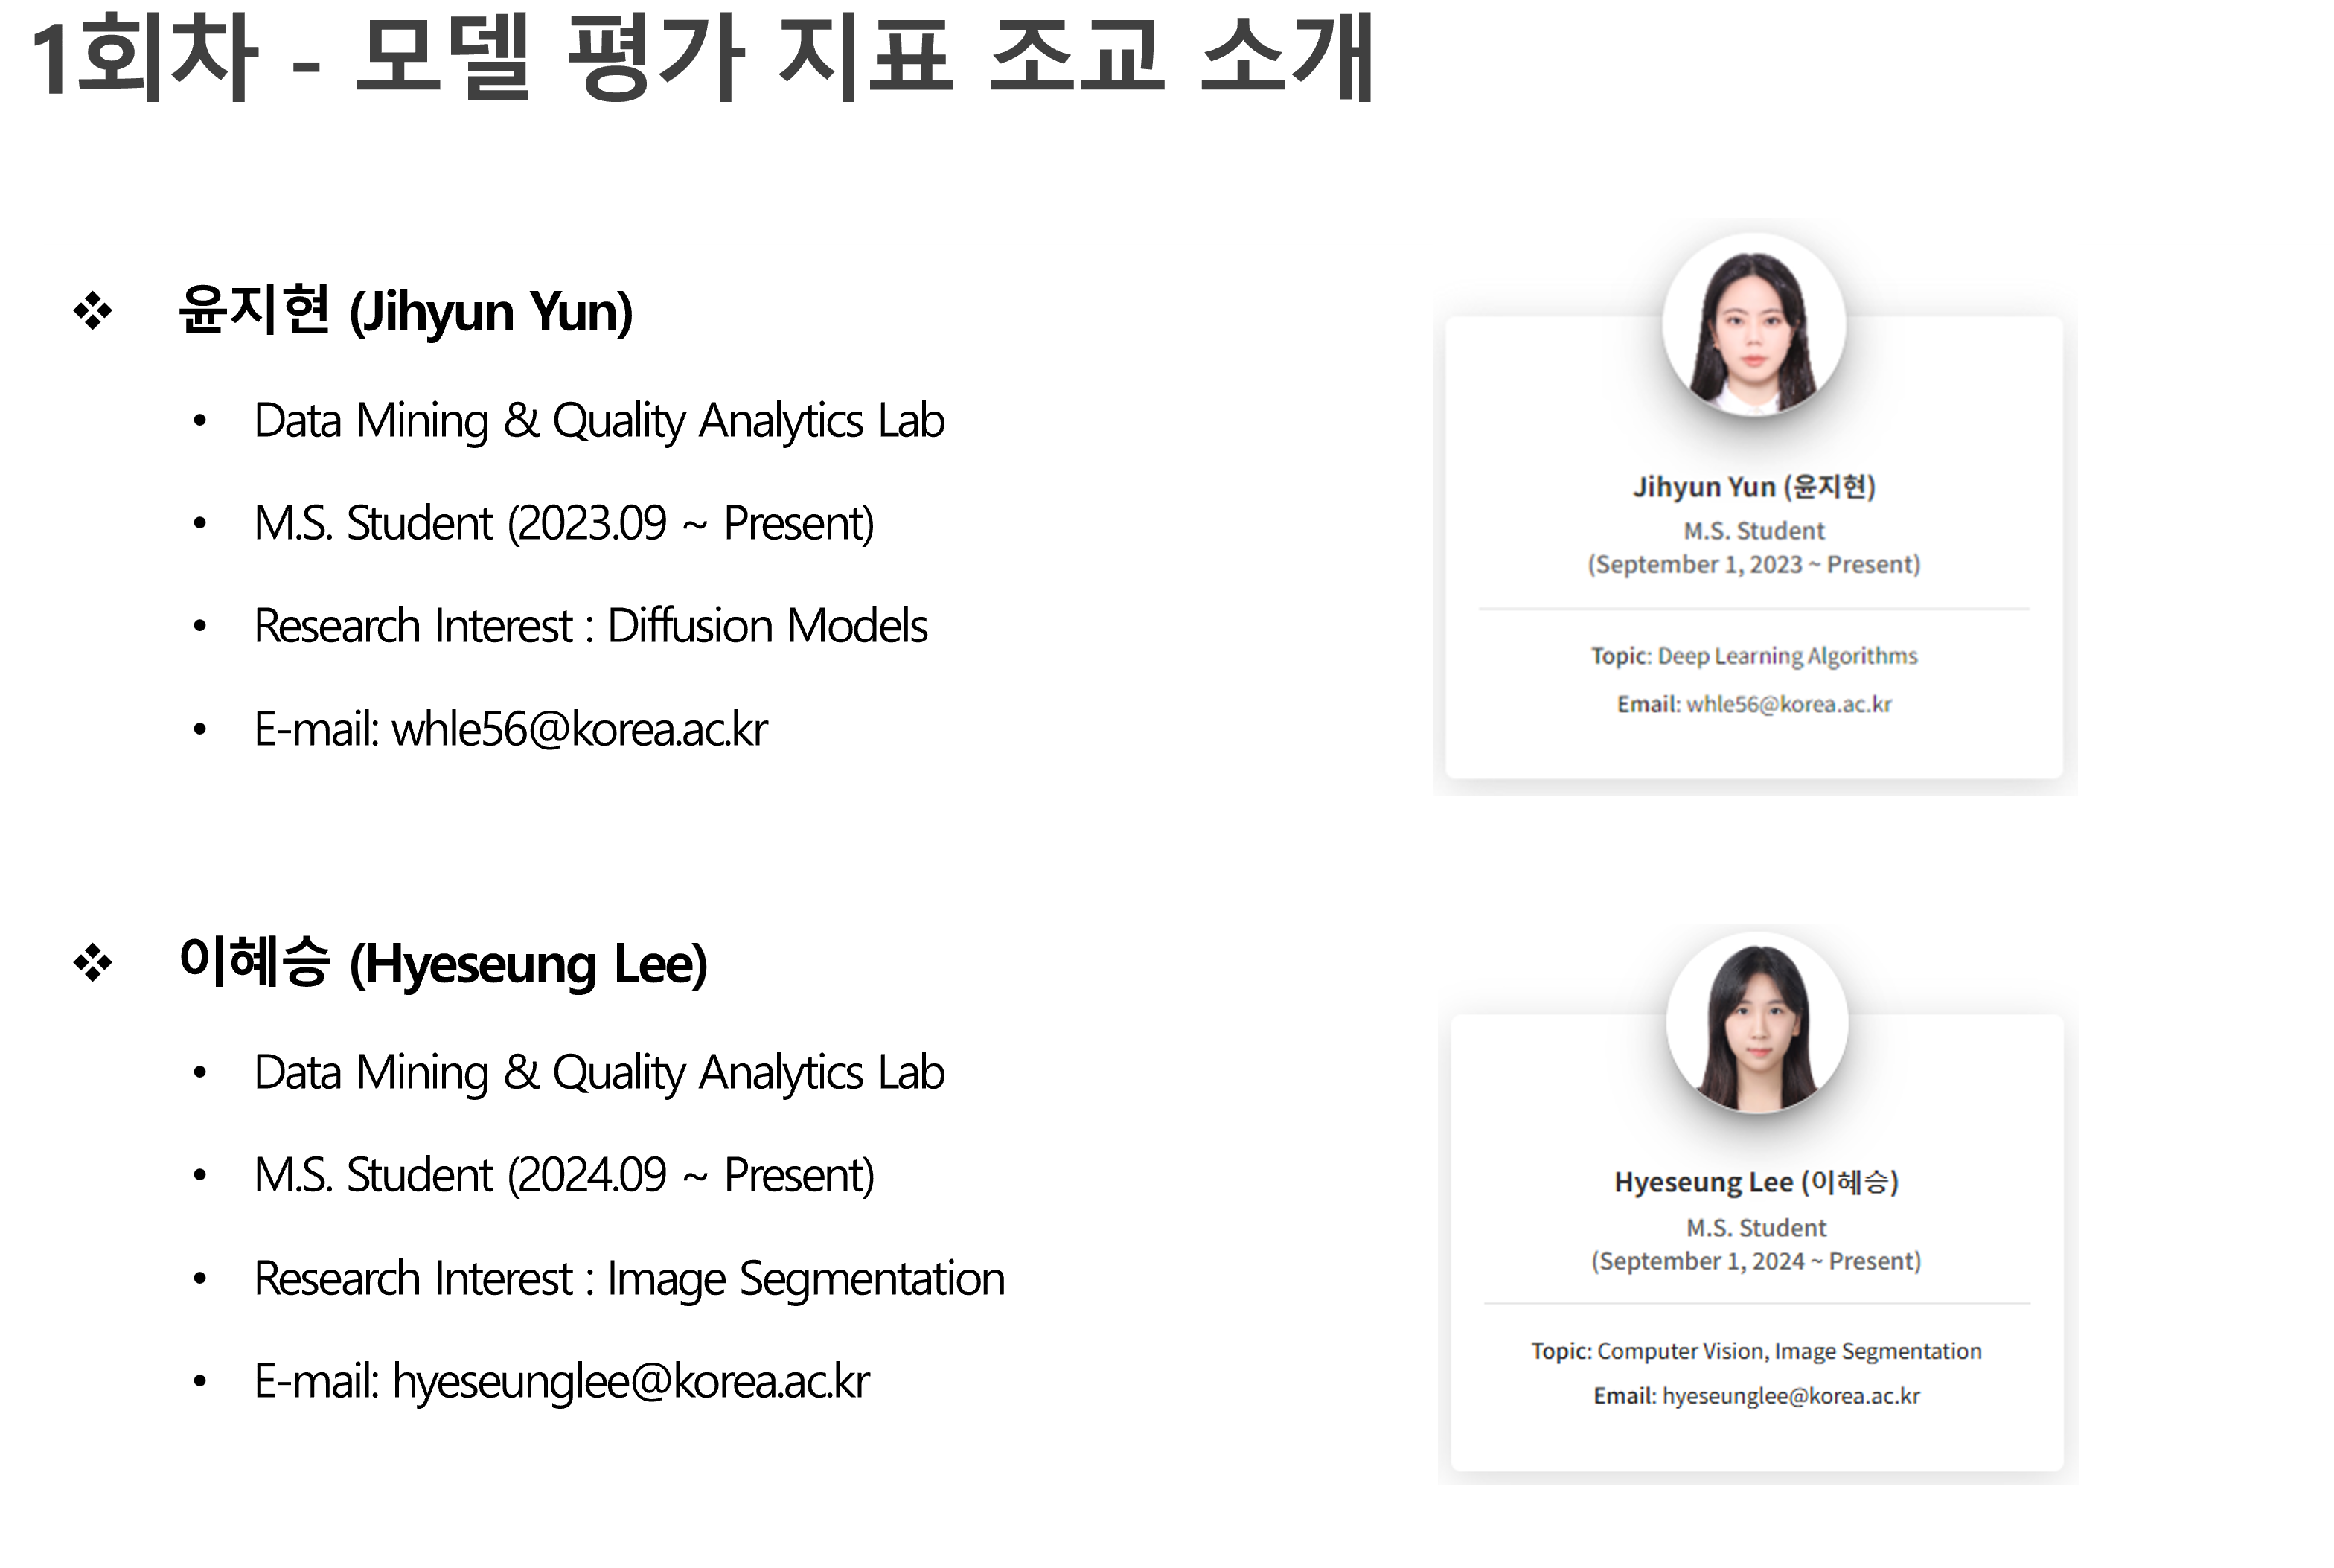

In [3]:
Image('./images/assistant.png')

### 머신러닝 모델

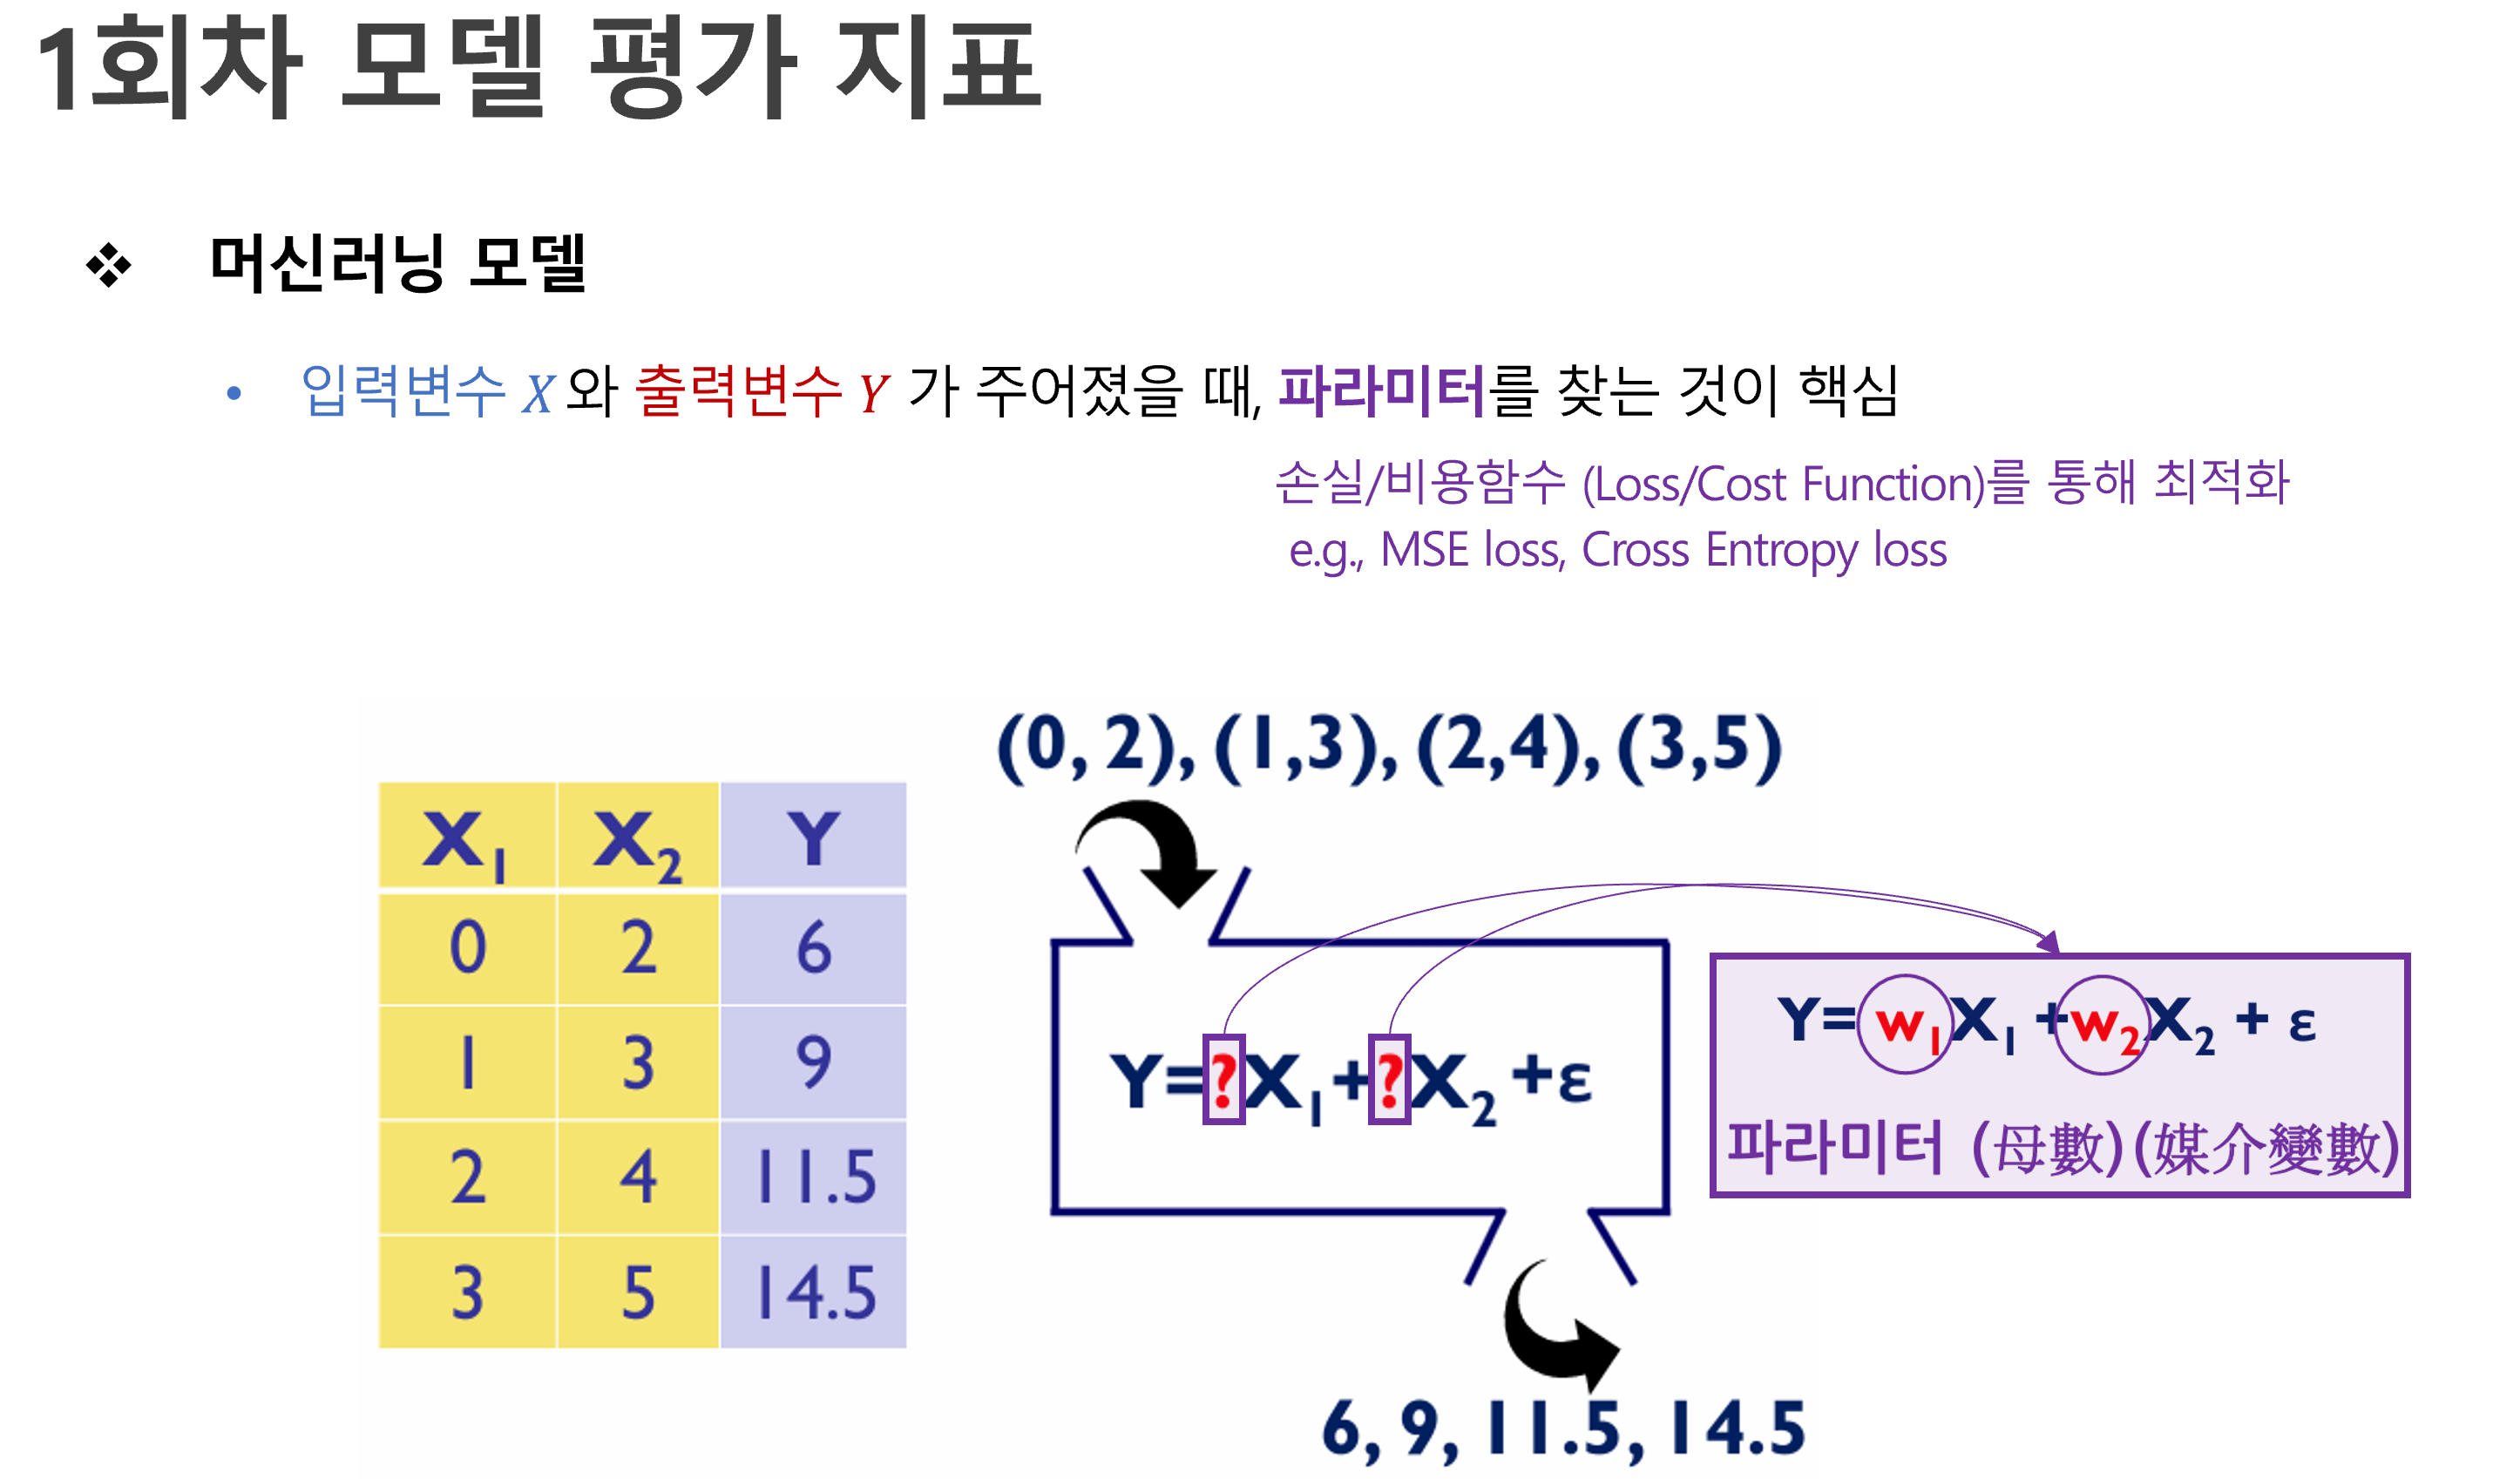

In [4]:
Image('./images/ml.png')

### 머신러닝 모델 성능 평가

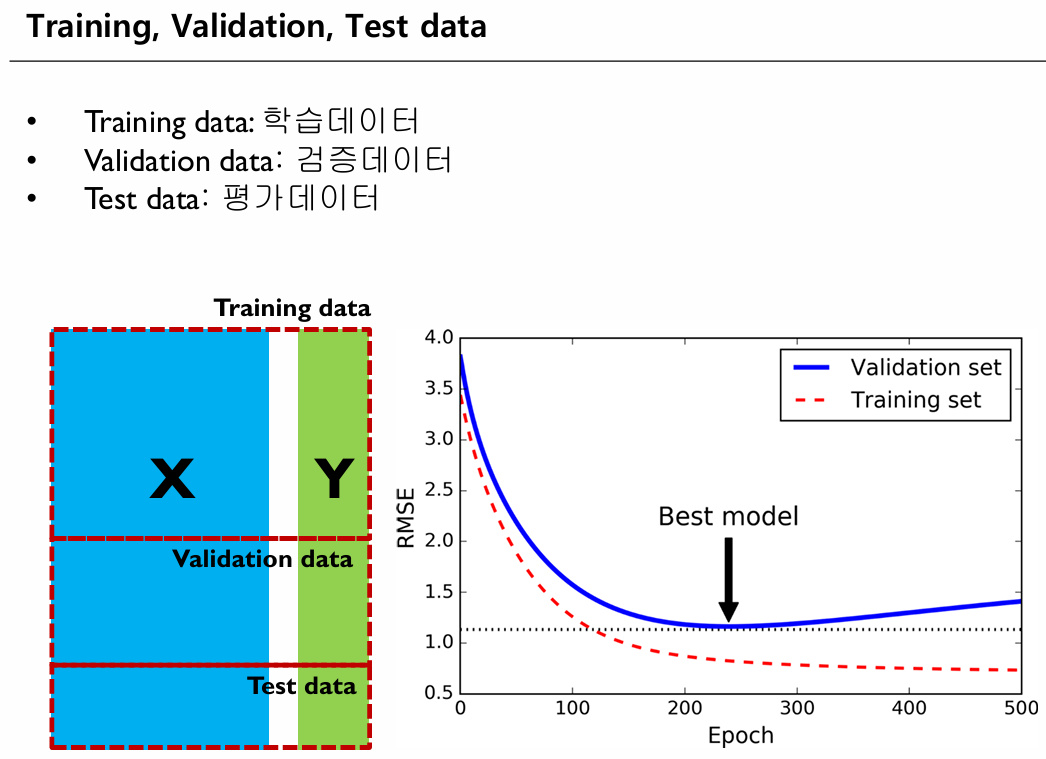

In [6]:
Image('./images/valid.png')

#### Q. 어떤 모델이 '좋은 모델'인가?

- 학습 데이터에 대해 100% 정확한 모형 (= 손실이 가장 작은 모형)을 만드는 것이 반드시 좋은 것은 아님
- 학습 데이터의 패턴을 외우게 되면, 학습 데이터에 존재하는 통제 불가능한 변동성 (noise)까지 예측 결과에 영향을 주는 요인이 됨
- 즉, 새로운 데이터에는 적용되지 않는 예측 기준을 세워버리는 것
- 이를 `과적합 (Overfitting)` 현상이라 일컫음  

- Test data (학습 시 보지 못한 새로운 데이터)의 성능을 검증해 줄 Validation data 필요

    - 기초적인 선형 회귀 모델이나 머신러닝 모델은 보통 데이터가 크지 않아 validation을 별도로 지정하지 않음
    - 딥러닝은 파라미터 수가 더 많아 과적합이 쉽게 발생하므로, 학습 중 성능을 모니터링하고 조기에 학습을 종료하는 추가적인 기법을 도입함. 이때 validation data를 적극 활용.
    - 더불어, 딥러닝은 모델 정의 시 하이퍼파라미터 (learning rate, batch size, dropout rate, etc.)가 많아서 이를 최적화 하는 과정에서도 validation data가 필요

### 0. 라이브러리 정의

#### `import` 기본 개념
- 수학 계산, 데이터 분석, 머신러닝 활용을 위해서 **추가적인 기능 (라이브러리, 패키지, 모듈)**을 불러와서(import) 사용
    - 모듈 (module): `.py` 파일 하나에 여러 함수와 변수가 정의된 파일
    - 패키지 (package): 여러 모듈을 포함하는 폴더 구조

In [ ]:
# 모듈 불러오기

'''data handling'''
import numpy as np   # numpy 모듈 // as: 별칭 사용 (긴 이름의 라이브러리를 짧게 줄여서 사용 가능 - np/pd가 관례)
import pandas as pd

'''visualization'''
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image  # 특정 기능 (함수, 변수, 클래스)만 불러와서 사용 가능 (Ipython 모듈에서 display 클래스에 정의된 Image 메서드 불러오기)

'''warning handling'''
import warnings
warnings.filterwarnings(action='ignore')

#### **판다스 (pandas)**
- pandas는 정형 데이터 처리에 유용한 라이브러리
- [참고링크](https://pandas.pydata.org/pandas-docs/stable/)
- 일반적으로 데이터프레임 (DataFrame) 데이터 구조를 기반으로 정형 데이터 분석을 수행
    - 2차원 데이터의 행 방향 index와 열 방향 columns으로 값 values이 존재
- 딕셔너리, 리스트, 2차원 numpy array 등을 기반으로 데이터프레임을 만들 수도 있음

#### **넘파이 (numpy)**
- 수치 데이터를 다루는 python 패키지
- 다차원 행렬 자료구조인 ndarray를 통해 벡터/행렬 연산을 수행하는 선형대수 계산에서 자주 사용
- numpy 배열에는 축의 개수 (ndim)와 크기 (shape)라는 개념이 있음
    - ndim: array가 몇 차원인지 (e.g., 2차원)
    - shape: 크기가 어떻게 되는지 (e.g., (2, 3))

### 1. 데이터 불러오기: California housing dataset

**데이터 구조**
- 관측치 개수: 20,640개
- 변수 개수: 입력/설명/독립변수 8개 / 출력변수 1개

**입력 변수(원인: 예측값을 설명할 수 있는 변수) -> "X"** 

- MedInc: 중간 소득 (Median Income)
- HouseAge: 주택 연식 (Housing Age)
- AveRooms: 가구 당 평균 방 개수 (Average Rooms per Household)
- AveBedrms: 가구 당 평균 침실 수 (Average Bedrooms per Household)
- Population: 지역 내 총 인구 수
- AveOccup: 평균 가구원 수 (Average Household Size)
- Latitude: 블록 그룹 위도 
- Longitude: 블록 그룹 경도

**출력 변수(결과: 예측하고자 하는 값, 모델 출력 값) -> "Y"**
- Price: 주택 가격

In [3]:
# 데이터 불러오기
from sklearn.datasets import fetch_california_housing  # scikit-learn에서 제공하는 데이터셋

In [4]:
"""데이터 불러오기"""

california = fetch_california_housing()  # 변수 정의
print(california)  # 정의된 변수 확인

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

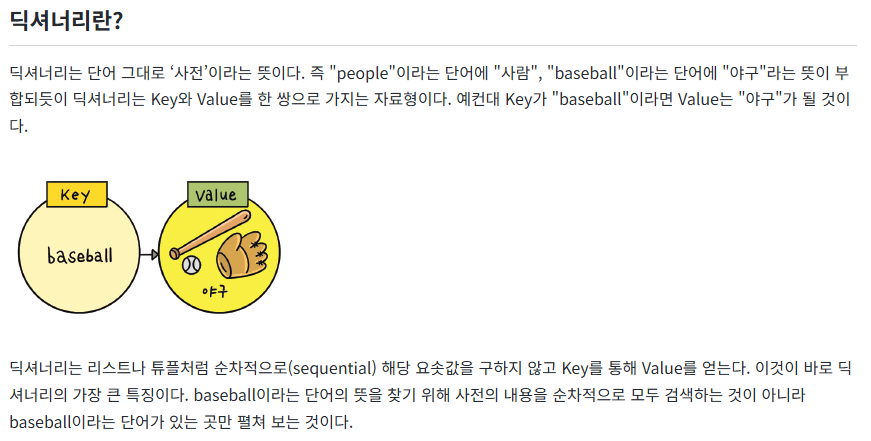

In [15]:
Image('./images/dict.png')

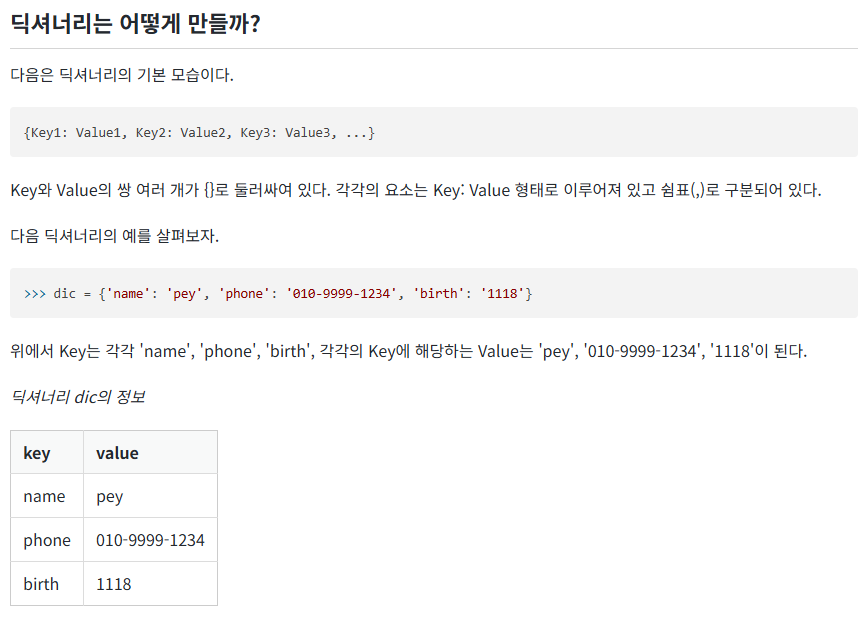

In [16]:
Image('./images/dict2.png')

In [5]:
# dictionary 자료형으로 저장된 변수 확인

# 1. dictionary의 keys 확인
print(california.keys(), '\n')

# 2. dictionary의 values 확인
print(california.values(), '\n')

# 3. dictionary의 keys + values 한 번에 확인 (items)
print(california.items(), '\n')

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']) 

dict_values([array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), None, ['MedHouseVal'], ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], '.. _california_housing_dataset:\n\nCal

In [6]:
print('data: \n', california['data'], '\n')  # 특정 key ('data')의 value 확인하기
print('target: \n', california['target'])

data: 
 [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]] 

target: 
 [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
"""데이터 확인"""

print("데이터 형태 : ", california['data'].shape)
print("사용 변수 : ", california['feature_names'])

데이터 형태 :  (20640, 8)
사용 변수 :  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
"""X, y 예시"""
print("X samples : \n", california['data'][:3], '\n')  # 모두 수치형 값
print("X variables : \n", california['feature_names'], '\n')  # X 변수 이름

print("y samples : \n", california['target'][:3])      # 모두 수치형 값

X samples : 
 [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]] 

X variables : 
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] 

y samples : 
 [4.526 3.585 3.521]


In [7]:
# 딕셔너리 자료 구조의 데이터를 pandas dataframe으로 바꾸기
## 기본적인 머신러닝 모델 분석 및 데이터를 다루는 데 있어서 가장 유용한 tool!

X = pd.DataFrame(california['data'], columns=california['feature_names'])
y = pd.DataFrame(california['target'], columns=['Price'])

In [8]:
# X 예시 살펴보기: head(n=N) 함수를 통해서 '상위' N개 샘플 출력
X.head(n=5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
# y 예시 살펴보기: head(n=N) 함수를 통해서 '상위' N개 샘플 출력
y.head(n=5)

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [10]:
# y 예시 살펴보기: tail(n=N) 함수를 통해서 `하위` N개 샘플 출력
y.tail(n=5)

,Price
20635,0.781
20636,0.771
20637,0.923
20638,0.847
20639,0.894


In [11]:
# 데이터 프레임 합치기
## concat: concatenation (데이터프레임 병합 시 활용하는 함수)
## concat([df1, df2])을 이용하여 어떤 데이터프레임을 합칠 지 정의
## cf. axis: 행/열 둘 중 어느 축으로 합칠 지를 결정. 0이 행, 1이 열

df = pd.concat([X, y], axis=1)
df.head()  # head 함수의 `n` 인자 디폴트 값은 5

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 3. 데이터 전처리
- 데이터를 모델에 입력 가능한 형태로 가공하기 이전에, 데이터의 특성을 탐색적으로 파악하고 분석하는 과정이 필요
- 이런 탐색적 데이터 분석을 `EDA`라 칭함
- 데이터 시각화를 비롯하여 분석에 있어 필요한 기본 사항 및 사전 지식을 검토하는 과정

In [ ]:
# 데이터 구조 확인

df.info()  # 결측 값이 없는 것을 확인, 모든 변수의 값이 실수 (float) 형태로 담겨 있음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [170]:
# 데이터 결측치 확인

df.isnull()  # isnull()은 결측 여부를 True/False로 반환

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()  # sum()을 통해서, 결측치 개수를 확인 가능 (True:1, False:0 으로 연산)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [137]:
# `describe()` 메서드를 통해서 우리의 데이터의 각종 통계량을 한 번에 요약해서 확인 가능
## 기본적으로 NaN (결측 데이터) 값은 제외되고 데이터 요약이 수행됨

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df.describe().round(3)  # `round` 함수를 통해서 실수 값을 반올림 (몇 번째 자리까지 보여줄 것인지를 설정 가능)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000
mean,3.871,28.639,5.429,1.097,1425.477,3.071,35.632,-119.570,2.069
std,1.900,12.586,2.474,0.474,1132.462,10.386,2.136,2.004,1.154
min,0.500,1.000,0.846,0.333,3.000,0.692,32.540,-124.350,0.150
25%,2.563,18.000,4.441,1.006,787.000,2.430,33.930,-121.800,1.196
50%,3.535,29.000,5.229,1.049,1166.000,2.818,34.260,-118.490,1.797
75%,4.743,37.000,6.052,1.100,1725.000,3.282,37.710,-118.010,2.647
max,15.000,52.000,141.909,34.067,35682.000,1243.333,41.950,-114.310,5.000


In [172]:
# Feature 간 상관관계 분석

## 데이터프레임의 경우, corr() 메소드로 상관 행렬 자동 계산 가능
corr_matrix = df.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


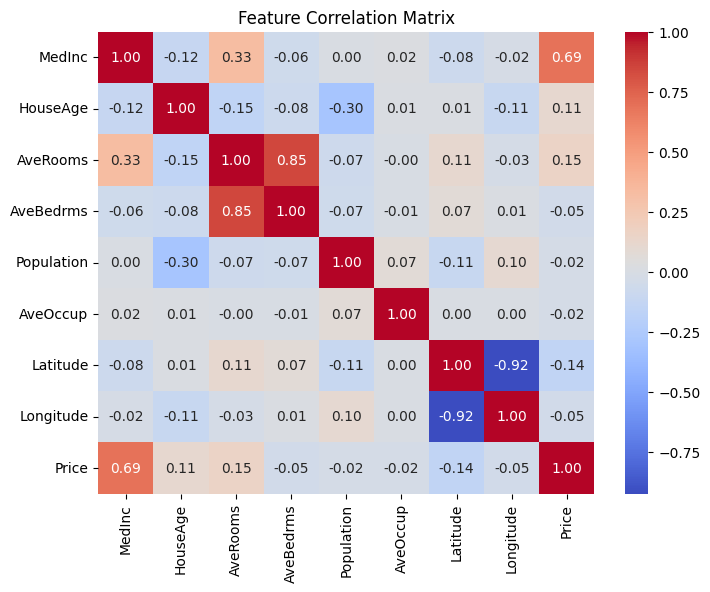

In [173]:
# 상관 행렬 시각화: heatmap 이용
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

#### Insights from correlation matrix heatmap
* 예측하고자 하는 타겟 변수와 가장 강한 상관관계를 가지는 변수는 `MedInc` (0.69).
    - 즉, 소득이 높을 수록 주택 가격도 비싸다는 것을 추론 가능
* `AveRooms`(방 개수)는 약한 양의 상관관계 (0.15)를 가지며, 방 개수가 많을수록 가격이 조금 더 높아질 가능성이 있음을 시사
* `Population`은 상관계수가 -0.02로, 절대 값이 가장 낮아 주택 가격과 인구 수가 거의 관계 없음을 보여줌
* `AveRooms`&`AveBedrms`, 그리고 `Latitude`&`Longitude는` 서로 유사한 의미를 가지고 있으며, 다중공선성 문제가 있을 가능성이 있음
    - 다중공선성: 입력/설명변수(X) 간에 높은 선형관계가 있는 경우

In [ ]:
# 다중공선성 (VIF (분산 팽창 계수, Variance Inflation Factor))확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['Price'])

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


- VIF < 5: 다중공선성 문제 없음
- VIF > 5: 다중공선성이 존재 가능 → 변형 고려
- VIF > 10: 다중공선성이 매우 높음 → 제거 또는 변형 고려 (하나를 제거하거나 차원 축소)

독립 변수(Feature)들 간에 강한 상관관계가 있는 경우 발생하는 문제를 의미하며, 선형 회귀로 모델링 시 회귀 계수가 불안정해지거나 모델의 예측 성능이 저하될 여지가 있음

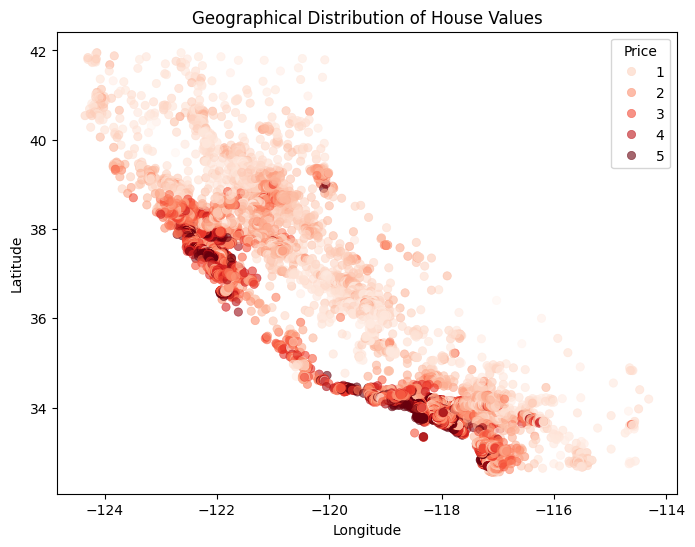

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Longitude"], y=df["Latitude"], 
                hue=df["Price"],   # 가격에 따라 색상 변화
                palette="Reds",    # 붉은 계열 그라데이션
                alpha=0.6,         # 투명도 설정
                edgecolor=None     # 테두리 제거
                )
# 그래프 제목 및 라벨
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of House Values")
plt.legend(title='Price')
plt.show()

#### Insights from the figure
지역적 특성 분석 (지리적 분포 시각화) 결과,
- 남쪽 (위도Latitude가 낮은 지역-LA, San diego 부근 등)에서 주택 가격이 높은 경향 (진한 붉은 색)이 있으며,
- 중부 캘리포니아 및 북쪽 지역 (위도가 높은 지역)에서는 대부분 낮은 가격 (연한 붉은 색)
- 서쪽 (경도가 낮은 지역)이 더 비싼 경향이 있음 (샌프란시스코, 실리콘밸리 등 서해안 고소득 지역이 있기 때문일 가능성)

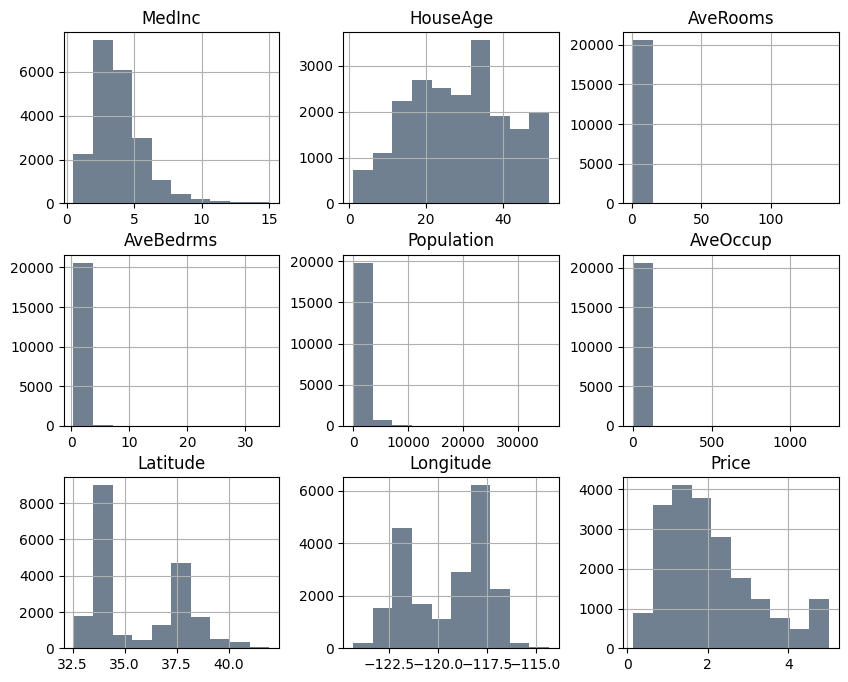

In [151]:
# 수치형 데이터의 분포를 시각적으로 확인
df.hist(figsize=(10,8), color='slategrey');

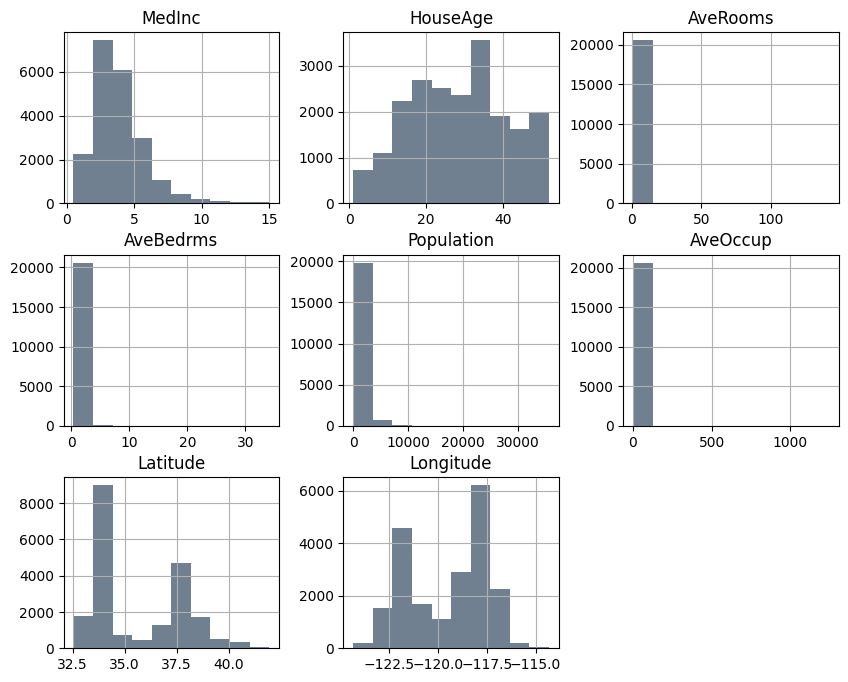

In [ ]:
x_cols = [col for col in df.columns if col!='Price']  # 리스트 컴프리헨션 (아래 for문과 동일한 결과 값 산출)
# x_cols = []
# for col in df.columns:
#     if col != 'Price':
#         x_cols.append(col)

df.hist(column=x_cols,  # 데이터프레임의 컬럼 중 y column (Price)만을 제외
        figsize=(10,8), color='slategrey')
plt.show()

#### Insights from Input Variables
- `MedInc`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup` 8개 중 5개 가량 변수가 오른쪽 꼬리가 긴 positive skewed 편향 분포를 보임. 모델이 이상치의 영향을 받을 수 있음
    - 이상치를 잘 핸들링 할 필요가 있음 (대체/제거/도메인 지식을 기반으로 변환 등)
- `Latitude` & `Longitude` (위도 & 경도)의 경우, 특정 구간에 집중되어 있음을 확인. 즉, 위치 기반 특성이 중요할 가능성 시사  

- 데이터 값의 `스케일 및 범위가 모두 다름`
    - **스케일을 맞춰주는 정규화/표준화 과정** 필요
    - 입력 변수의 스케일에 차이가 있는 경우 모델 학습에 편향이 생길 수 있음
    - 모델의 파라미터가 큰 값을 가진 변수에 더 큰 가중치를 부여하는 방향으로 학습될 여지 및 특정 변수에 지나치게 민감하게 반응할 수 있는 학습 불안정성 발생
    - 머신러닝 모델보다도 경사하강법 (Stochastic Gradient Descent) 기반 최적화를 수행하는 딥러닝 모델에서 더더욱 중요 (수렴 및 최적 가중치 찾는 데 입력 변수 스케일이 중요한 영향을 줌)
    - 선형 회귀 모델 (Linear Regression)에서는 정규화 여부가 성능에 큰 영향을 주지는 않으나, 일반적으로는 정규화를 수행하는 것이 유리

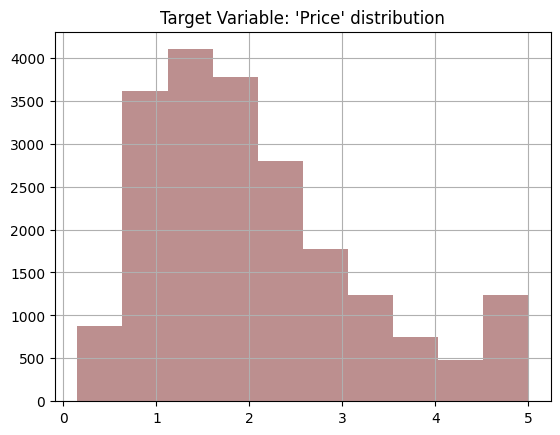

In [153]:
plt.hist(df['Price'], color='rosybrown')
plt.title("Target Variable: 'Price' distribution")
plt.grid()
plt.show()

#### Insights from Target Variable
- 오른쪽 꼬리가 긴 오른쪽 편향(Positive Skewed) 분포를 보임
- 일부 구간(높은 가격대)에서 극단값이 존재할 가능성이 있음 (학습 데이터에 극단 값을 반영한 데이터가 없을 경우 test 시 예측 성능 하락 가능)

#### 데이터 전처리

- Train, Test set 나누는 과정이 선행되어야 함
- 데이터 Scaling 작업

    [Scaler  종류]
    
|종류|설명|수식|특징|
|:------:|:---:|:---:|:---:|
|StandardScaler|평균과 표준편차 사용|$$ {X-\mu} \over  \sigma $$|이상치에 민감|
|MinMaxScaler|최대/최소값이 각각 1, 0이 되도록 스케일링|$$ {X-X_{min}} \over  {X_{max}-X_{min}} $$|이상치에 민감|
|RobustScaler|중앙값(median)과 IQR(interquartile range) 사용|$$ {X-X_{median}} \over  {IQR} $$|이상치에 덜 민감|

In [ ]:
# 입력 데이터 스케일 조정하기

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# 변수 스케일을 조정해줄 scaler 정의
## MinMax: 값을 [0, 1] 사이의 값으로 변환 (정규화)
## Standard: 값의 평균을 0, 표준편차 1로 변환 (표준화)
### 데이터 스케일을 조정해줄 수 있는 여러 방법을 비교/적용하는 과정이 필요

scaler = StandardScaler()  # MinMaxScaler(), RobustScaler()

#### Note
* 표준화는 입력 데이터 샘플 $x$를 $Z=\frac{(x-\mu)}{\sigma}$ 로 변환 ($\mu$는 데이터셋의 평균, $\sigma$는 데이터셋의 표준편차)하는 것을 말함.
* 이때, $\mu$와 $\sigma$는 **학습 데이터**의 통계량 값이어야 함에 주의!
  * MinMax scaling 시에도, $min$, $max$는 **학습 데이터**의 최소 최대 값이어야 함!
  * Test set에 대한 정보 없이, 훈련 데이터의 정보만으로 학습했을 때 일반화 가능한 예측 성능을 내게 하기 위함 (cheating 방지)
  * 수능 문제를 미리 알지 못한 채 모의고사로 훈련하는 과정과 유사

In [188]:
# 데이터 분할: train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, # 분할할 데이터 입력
                                                    test_size=0.2, # test size: float, 전체 20%를 test 80%를 train으로 활용
                                                    random_state=1) # 데이터 랜덤 분할. 랜덤성 제어를 위해서 임의 값으로 고정

print(f'학습 데이터 형태:   {X_train.shape}')
print(f'테스트 데이터 형태: {X_test.shape}')

학습 데이터 형태:   (16512, 8)
테스트 데이터 형태: (4128, 8)


-------

- cf. `random_state`
- `seed`라고도 말하며 랜덤 함수가 생성하는 값의 시작점을 고정하는 값 (int)
- 즉, `seed`를 설정하면 **random 하지만 동일한 결과**를 얻을 수 있음
- 같은 코드가 실행될 때마다 같은 결과를 보장하는 **재현 가능성**, 여러 모델을 비교할 때 동일한 랜덤 결과를 바탕으로 실험을 진행할 수 있어 **동등 비교 가능**

In [19]:
# numpy.random을 사용하여 5개의 난수를 생성

print('1st 실행: ', np.random.rand(5))

1st 실행:  [0.67063787 0.21038256 0.1289263  0.31542835 0.36371077]


In [20]:
print('2nd 실행: ', np.random.rand(5))

2nd 실행:  [0.57019677 0.43860151 0.98837384 0.10204481 0.20887676]


In [ ]:
# seed 고정
np.random.seed(0)
# numpy.random을 사용하여 5개의 난수를 생성
print('1st 실행: ', np.random.rand(5))

1st 실행:  [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]


In [26]:
np.random.seed(0)  # seed 고정
print('2nd 실행: ', np.random.rand(5))

2nd 실행:  [0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]


In [2]:
## cf. 모든 라이브러리에 대해 seed 설정하기
import numpy as np
import random
import torch
import tensorflow as tf

def set_seed(seed:int=0):
    # Numpy
    np.random.seed(seed)
    # Python random 모듈
    random.seed(seed)
    # PyTorch (for deep learning)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # GPU 연산 시에도 고정
    # Tensorflow
    tf.random.set_seed(42)

# 함수 실행
seed=42
set_seed(seed=seed)

-------

In [189]:
X_train_scaled = scaler.fit_transform(X_train)  # scaler를 X_train 분포에 적합(fit)시킨 뒤, 변형 (transform)
X_test_scaled = scaler.transform(X_test)  # 학습 데이터 통계량에 적합된 scaler를 이용해 X_test를 변형 (transform)

In [190]:
# 분석/실습 용이성을 위해서 다시 데이터프레임으로 재변환
X_train_scaled = pd.DataFrame(X_train_scaled, columns=scaler.get_feature_names_out())  # get_feature_names_out()으로 기존 변수 명을 받을 수 있음
X_test_scaled = pd.DataFrame(X_test_scaled, columns=scaler.get_feature_names_out())

X_train_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.362326,1.858903,-0.168773,-0.168415,-0.486114,0.001901,0.972290,-1.422509
1,-0.141023,1.064348,-0.206655,-0.280981,-0.404243,0.009455,1.084596,-1.382659
2,-0.661450,-1.001494,1.106584,1.118131,-1.250537,0.020554,1.061199,-0.829737
3,-1.248647,0.428704,-0.625613,0.098447,1.880128,-0.044354,-0.754411,0.609852
4,1.828920,0.746526,0.173623,-0.083352,-0.600911,-0.060915,-0.815243,0.589927
...,...,...,...,...,...,...,...,...
16507,-1.106963,-0.922039,-0.530319,-0.024532,-0.308134,-0.053479,-0.876076,0.843972
16508,2.476651,1.064348,0.515505,-0.173633,-0.598241,-0.017144,-0.567235,-0.027752
16509,-1.450442,1.064348,-0.210560,-0.182925,-0.578663,-0.038796,-0.796526,0.654684
16510,-0.657643,-1.478227,-0.171982,-0.291459,-0.090999,-0.027713,-0.890114,1.202624


### 3. 모델 정의
##### `선형회귀 모델` (`Linear Regression`)
1. `sklearn`에서 제공하는 LinearRegression 이용
2. `statsmodels`에서 제공하는 OLS (Ordinary Least Squares) 이용
    - OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)을 최소화하는 가중치($\beta_1$, $\beta_2$ ...)를 구하는 방법
    - 모델 선언: model = sm.OLS(Y 데이터, X 데이터)   
    - 모델 학습: model_trained = model.fit()

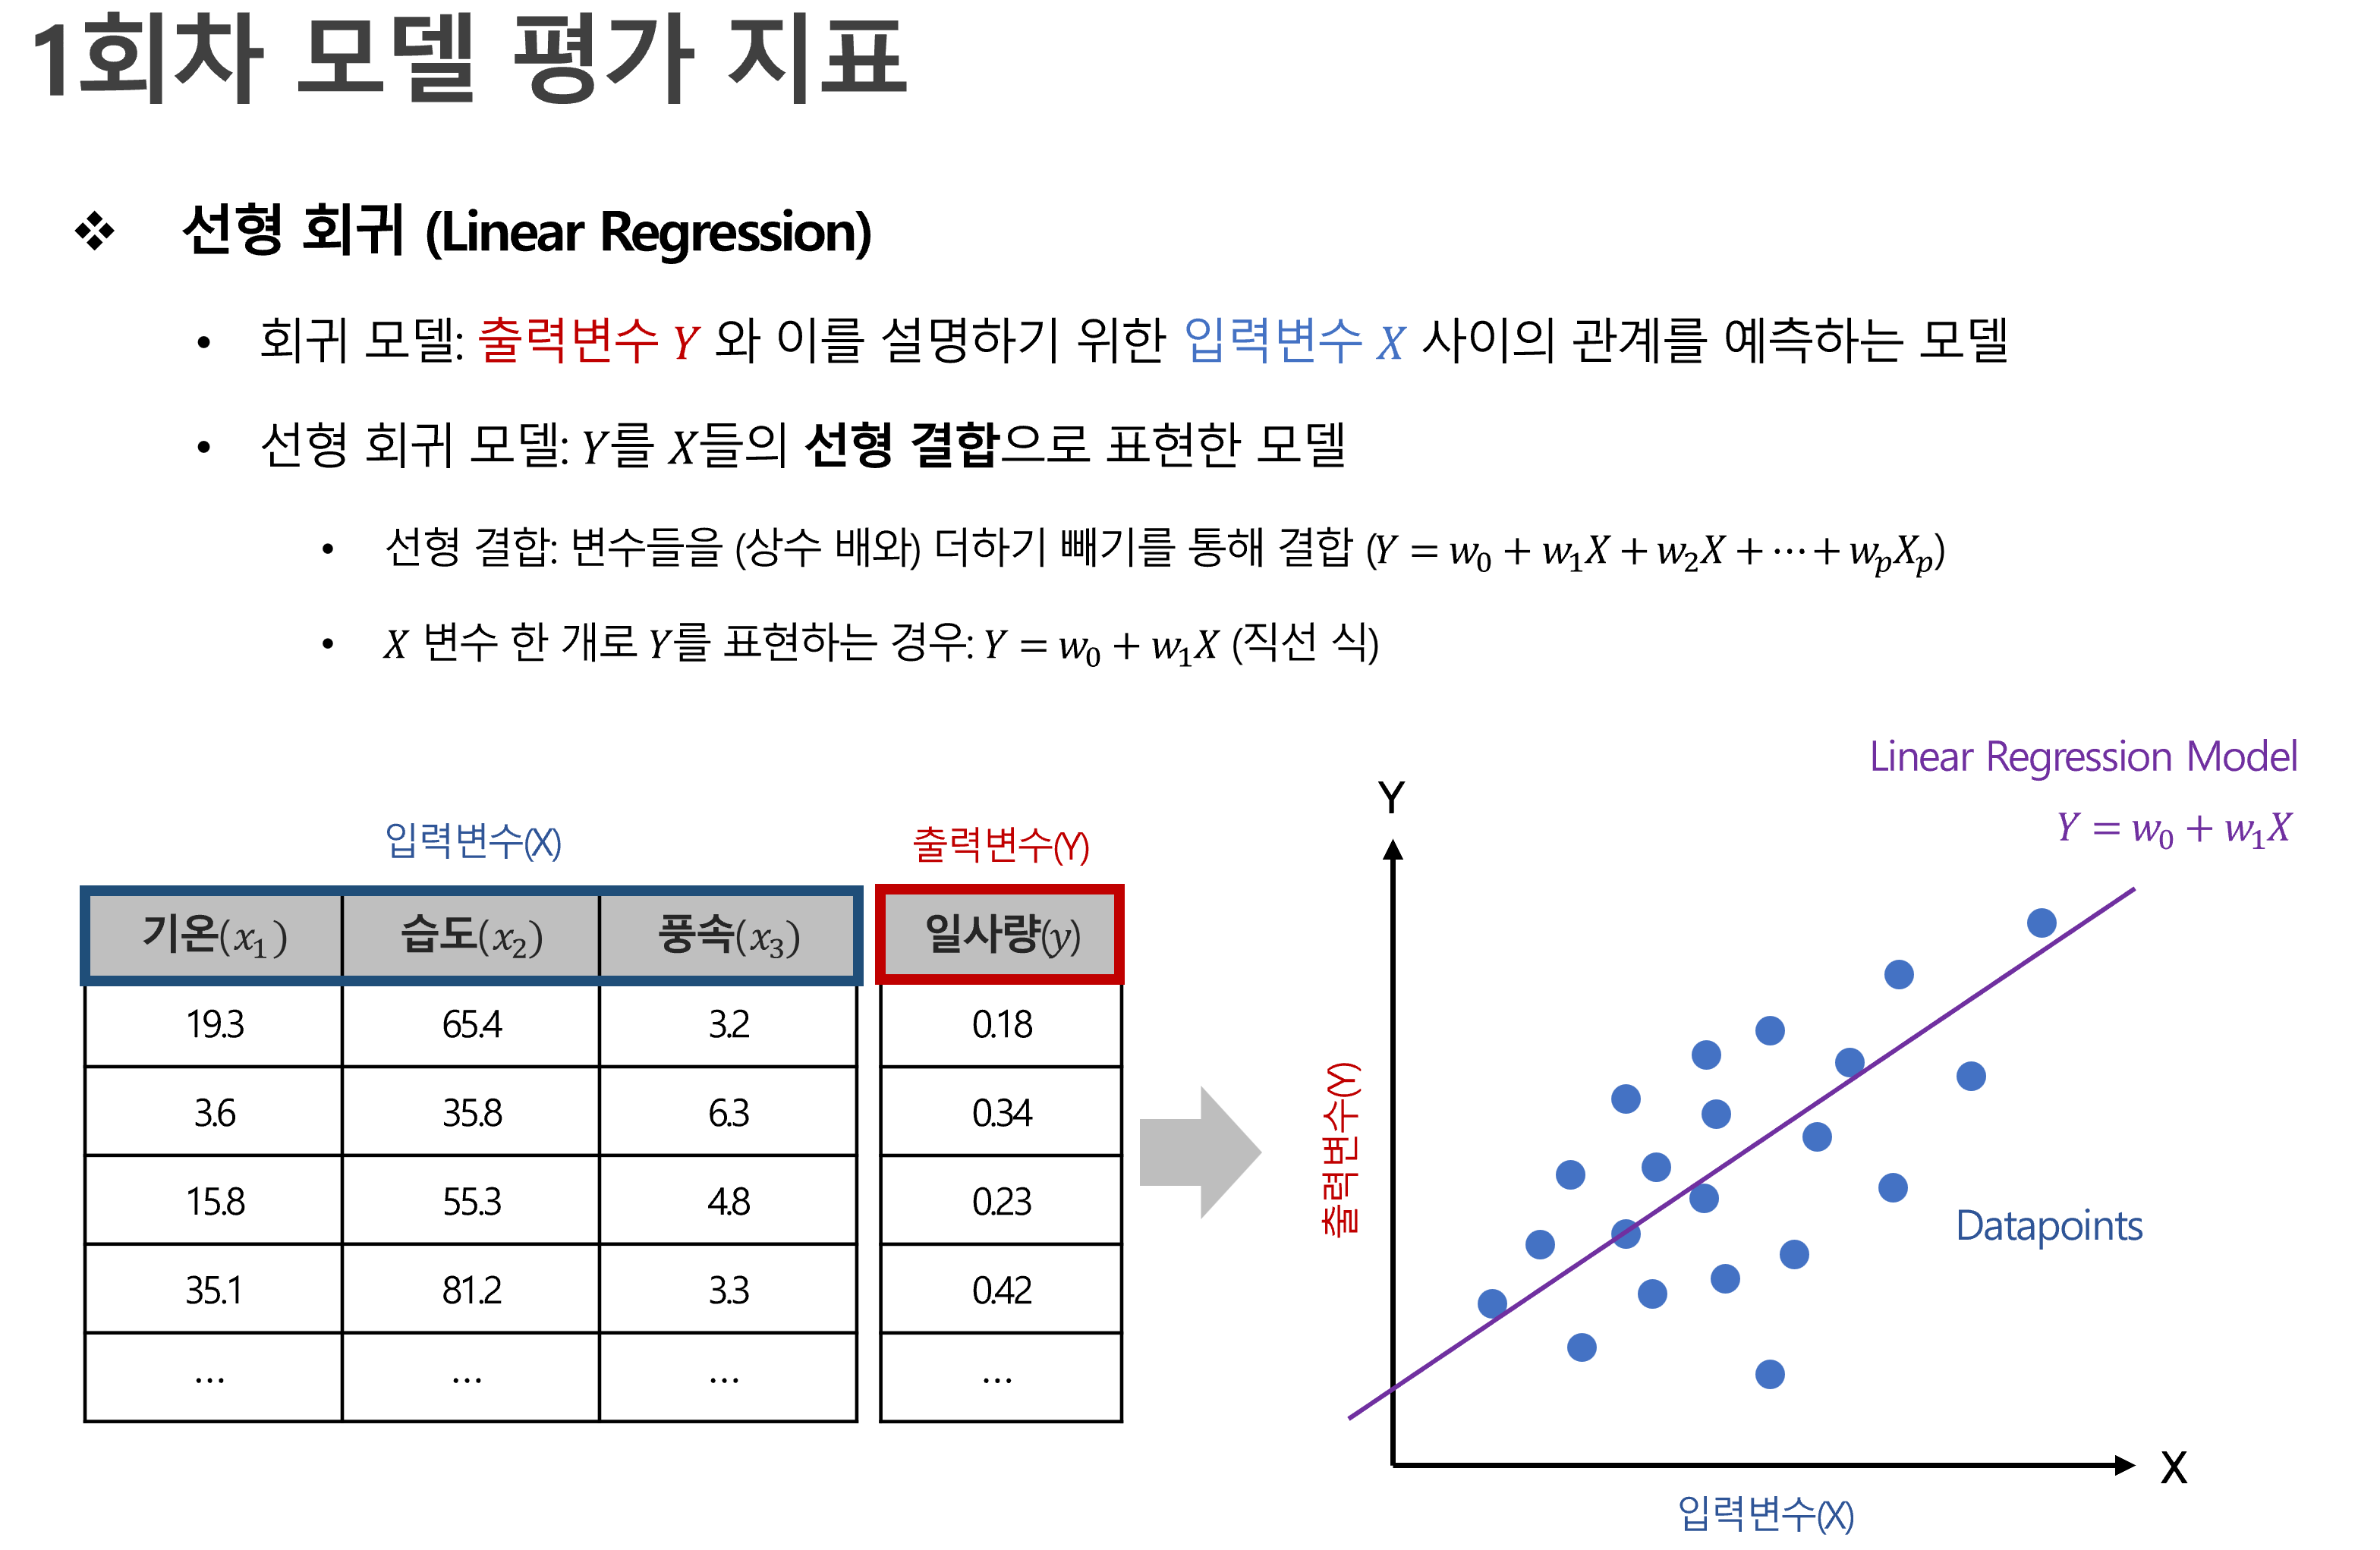

In [5]:
Image('./images/linear-reg.png')

In [191]:
from sklearn.linear_model import LinearRegression  # 기능 편리, 다른 머신러닝 모델과의 비교 시에도 유용
import statsmodels.api as sm  # 선형 회귀 모델을 통계적으로 해석할 때 활용

In [194]:
# 모델 생성

## sklearn 기반 모델 정의
linear_model1 = LinearRegression()

## OLS 기반 모델 정의
X_train_with_constant = sm.add_constant(X_train)  # 추가적인 상수항/절편(b0) 정의가 필요
linear_model2 = sm.OLS(y_train, X_train_with_constant, axis=1)

### 4. 모델 학습 (Train set)
- 일반적으로 `sklearn` 등에서 제공하는 머신러닝 모델은 `fit()` 메서드를 통해서 모델 학습 가능 (최적 파라미터 자동 탐색)
    - 딥러닝 모델은 사용자가 직접 학습 가능하게끔 훈련 코드를 별도로 작성해야 함

In [195]:
# `.fit()` 메소드를 통해 최적 파라미터 탐색 (모델 훈련)

## sklearn 기반 모델
linear_model1.fit(X_train, y_train)          # train 데이터에 모델을 적합시킴

## OLS 기반 모델
linear_model2_trained = linear_model2.fit()  # train 데이터에 적합된 모델을 새로운 변수로 선언해주어야 함

### 5. 모델 적용 (Test set)
- 모델 훈련 과정에서 사용하지 않았던 새로운 데이터를 이용해 예측 수행
- 모의고사를 통해 훈련한 모델이 수능을 보는 것

In [ ]:
# test 데이터를 이용해 한 번도 보지 못했던 새로운 입력 데이터에 대한 예측 값 출력

## sklearn 기반 모델로 예측
y_pred1 = linear_model1.predict(X_test)

## OLS 기반 모델로 예측
y_pred2 = linear_model2_trained.predict(
                                        sm.add_constant(X_test)    # predict 시 test set에서도 상수항/절편 정의 필요
                                        )

In [ ]:
pred_info = pd.concat(                                           # test 결과를 데이터프레임으로 만들기 (concat 이용)
                    [y_test,                                     # y_test는 실제 y 값
                     pd.DataFrame(y_pred1, index=y_test.index),  # sklearn을 통해 구축한 linear model 예측 결과
                     pd.DataFrame(y_pred2)                       # OLS를 통해 구축한 linear model 예측 결과
                    ],
                    axis=1                                       # 열 단위로 concat (합침)
                )

pred_info.columns = ['y_true', 'y_pred1', 'y_pred2']             # 컬럼 명 변경
pred_info.head(20)

,y_true,y_pred1,y_pred2
4712,3.550,2.125677,2.125677
2151,0.707,0.939771,0.939771
15927,2.294,2.708872,2.708872
82,1.125,1.712957,1.712957
8161,2.254,2.826805,2.826805
6636,2.630,3.495084,3.495084
17333,2.268,3.013057,3.013057
19081,1.662,1.630133,1.630133
13298,1.180,1.742161,1.742161
7157,1.563,2.020309,2.020309


- `sklearn`이든 `OLS`든, 어떤 라이브러리를 사용해도 동일한 결과 값
    - 모델 결과해석이 중시될 경우 OLS, 다른 머신러닝 모델과의 단순 성능 비교가 필요한 경우에는 sklearn 이용
- y_true (실제 y) 값과 y_pred (예측 y) 값 간의 비교 필요
    - 예측을 얼마나 정확하게 수행하였는지를 평가할 수 있어야 함

In [200]:
# OLS 기반으로 모델링 시, 아래 'summary()' 함수를 통해서 구체적인 결과 해석 및 확인 가능
## cf. sklearn 기반 모델은 관련 기능을 별도로 제공하지 않음

linear_model2_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     3205.
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:29:20   Log-Likelihood:                -18082.
No. Observations:               16512   AIC:                         3.618e+04
Df Residuals:                   16503   BIC:                         3.625e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.5158      0.738    -50.857      0.000     -38.962     -36.070
MedInc         0.4386      0.005     93.863      0.000       0.429       0.448
HouseAge       0.0097      0.000     19.406      0.000       0.009       0.011
AveRooms      -0.1047      0.006    -16.296      0.000      -0.117      -0.092
AveBedrms      0.6322      0.031     20.717      0.000       0.572       0.692
Population -3.677e-06   5.35e-06     -0.687      0.492   -1.42e-05    6.81e-06
AveOccup      -0.0034      0.000     -7.065      0.000      -0.004      -0.002
Latitude      -0.4260      0.008    -52.763      0.000      -0.442      -0.410
Longitude     -0.4406      0.008    -52.197      0.000      -0.457      -0.424
==============================================================================
Omnibus:                     3548.863   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10666.407
Skew:                           1.114   Prob(JB):                         0.00
Kurtosis:                       6.247   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 2회차 강의에서 선형 회귀 모델을 해석하고 모델링하는 다양한 방법을 배울 예정!
- 머신러닝/딥러닝 기반 비선형 회귀 모델에 대해서도 배우며 비교 가능!

### 6. 회귀모델 성능 평가
**예측 모델이 얼마나 정확하게 예측하였는지 평가** 필요

#### 6-1. 시각화를 이용하여 모델 성능 평가
    - 산점도 (Scatter Plot)을 이용해서 ##

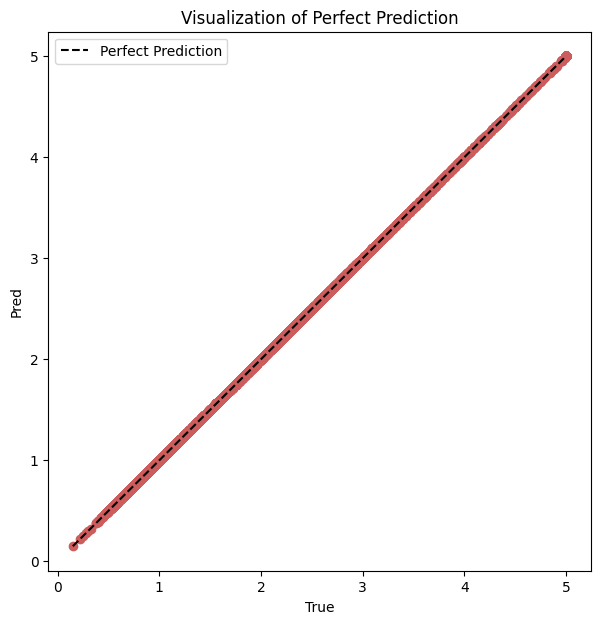

In [314]:
true, perfect_prediction = pred_info['y_true'], pred_info['y_true']

plt.figure(figsize=(7,7))
vmin, vmax = true.min(), true.max()
plt.scatter(true, perfect_prediction, color='indianred')  # scatter plot을 이용해서 얼마나
plt.plot([vmin, vmax], [vmin, vmax], color='k', linestyle='--', label='Perfect Prediction')
plt.xlabel('True')
plt.ylabel('Pred')
plt.legend(loc='best')
plt.title("Visualization of Perfect Prediction")
plt.show()

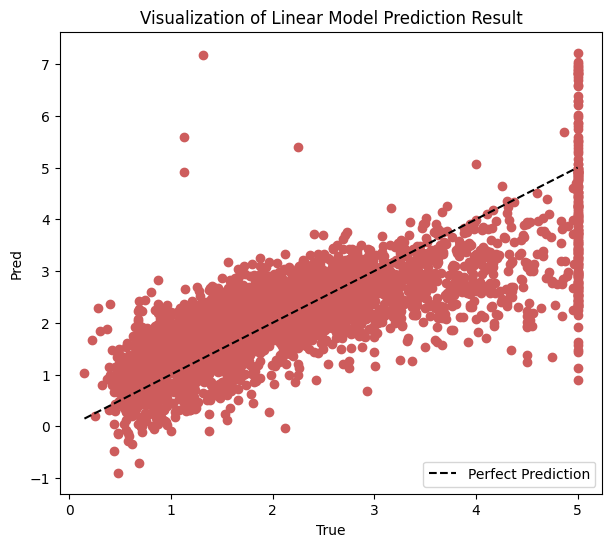

In [313]:
true, pred = pred_info['y_true'], pred_info['y_pred1']

plt.figure(figsize=(7,6))
vmin, vmax = true.min(), true.max()
plt.scatter(true, pred, color='indianred')
plt.plot([vmin, vmax], [vmin, vmax], color='k', linestyle='--', label='Perfect Prediction')
plt.xlabel('True')
plt.ylabel('Pred')
plt.legend(loc='best')
plt.title("Visualization of Linear Model Prediction Result")
plt.show()

#### 6-2. **정량적인 지표를 이용**하여서 객관적으로 평가해보자!

- 데이터 관측치가 $N$개 있다고 하였을 때, 관측치 $i$에 대해서
    - 실제 값은 $y_{i}$,
    - 예측 값은 $\hat{y}_{i}$  
    로 표현할 수 있음.

In [ ]:
pred_info['difference'] = (true - pred)   # 기존 데이터프레임에 새로운 값을 추가할 때 (기존 df와 동일한 차원의 값을 새로운 컬럼으로 할당)
pred_info

,y_true,y_pred1,y_pred2,difference
4712,3.550,2.125677,2.125677,1.424323
2151,0.707,0.939771,0.939771,-0.232771
15927,2.294,2.708872,2.708872,-0.414872
82,1.125,1.712957,1.712957,-0.587957
8161,2.254,2.826805,2.826805,-0.572805
...,...,...,...,...
2319,0.682,0.973345,0.973345,-0.291345
5341,2.250,1.749852,1.749852,0.500148
16888,3.500,2.946084,2.946084,0.553916
6823,2.273,2.638755,2.638755,-0.365755


In [ ]:
true, pred = pred_info['y_true'], pred_info['y_pred1']

# 실제 값과 예측 값의 차이를 단순 평균 (오차의 양/음이 달라 실제 값과 얼마나 차이가 나는지 절대적인 가늠이 어려운 문제)
np.mean(true - pred)

-0.021773939158410374

#### **Mean Absolute Error (MAE, 평균 절대 오차)**
- $MAE=\frac{1}{N} \sum_{i=1}^{N} |y_{i}-\hat{y}_{i}|$
- *모든 실제 값과 예측 값의 차이 (오차)를 절댓값으로 변환해 평균을 낸 것!*
    - 값이 낮을 수록 좋음
- 장점: 오차의 크기를 직관적으로 해석 가능 (e.g., 집 값 예측 시, 평균적으로 5만원 정도의 오차가 발생)
- 단점: 큰 오차가 평균 계산 시 영향을 주는 경우에는 값이 왜곡될 우려가 있음, 절댓값을 사용하기에 예측 값이 실제보다 크거나 작은지 파악 어려움  

In [295]:
# 실제 값과 예측 값의 절대적 차이를 단순 평균

MAE = np.mean(
    np.abs(true - pred)   # np.abs를 통해서 값의 절대 값 (absolute) 계산 가능
)

print(f'Mean Absolute Error: {MAE:.4f}')

Mean Absolute Error: 0.5329


#### **Mean Squared Error (MSE, 평균 제곱 오차)**
- $MSE=\frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^{2}$
- *각 오차를 제곱한 후 평균을 낸 것!*
    - 값이 낮을 수록 좋음
- 장점: 예측이 크게 빗나가 큰 오차가 있을 경우 이를 더 강조하여 panelty를 주는 특징, 미분 가능하여 회귀 모델 학습 시에 사용
- 단점: 실제 값과 단위 통일이 되지 않아 직관적 해석이 어려움, 제곱을 취하기에 예측 값이 실제보다 크거나 작은지 파악 어려움  

In [296]:
MSE = np.mean(
    np.square(true - pred)   # np.square를 통해서 값의 제곱 계산 가능
)

print(f'Mean Squared Error: {MSE:.4f}')

Mean Squared Error: 0.5291


#### **Root Mean Squared Error (RMSE, 제곱근 평균 제곱 오차)**
- $RMSE=\sqrt{MSE}=\sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^{2}}$
- *MSE의 단점을 보완!* 루트를 씌워서 원래 단위로 되돌린 값!
    - 값이 낮을 수록 좋음
- 장점: 원래 데이터와 단위가 같이 해석이 쉽고, MSE보다 큰 오차에 덜 민감
- 단점: MAE보다는 큰 오차의 영향력을 더 크게 평가

In [ ]:
RMSE = np.sqrt(MSE)  # sqrt로 지정된 값의 제곱근 도출

print(f'Mean Squared Error: {RMSE:.4f}')

Mean Squared Error: 0.7274


#### **Mean Absolute Percentage Error (MAPE, 평균 절대 백분율 오차)**
- $MAPE=\frac{100}{N} \sum_{i=1}^{N} |\frac{y_{i}-\hat{y}_{i}}{{y}_{i}}|$
- *MAE를 비율(%)로 변환한 값!* (오차가 실제 값과 비교하였을 때 몇 %나 차지하는가?)
    - 값이 낮을 수록 좋음
- 장점: 단위가 %이기에 해석이 직관적 (예: 평균적으로 5% 오차)이고 단위가 다른 데이터셋에 대해서도 모델 성능 비교 가능
- 단점: 실제 값이 0에 가깝거나 포함된 경우에는 계산이 어려워 사용 불가능

In [307]:
MAPE = 100 * np.mean(np.abs(true-pred)/true)

print(f'Mean Absolute Percentage Error: {MAPE:.4f}%')

Mean Absolute Percentage Error: 32.7770%


#### **R squared ($R^2$, 결정계수)**
- $R^2=1-\frac{\sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^{2}}{\sum_{i=1}^{N} (y_{i} - \bar{y})^{2}}$, where $\bar{y}$는 $N$개 관측 값의 평균
- 모델이 *실제 데이터를 얼마나 잘 설명*해주는지 보여주는 지표!
- 0에서 1 사이의 값이며, 값이 클 수록 (1에 가까울 수록) 좋음
    - 모델이 실제 데이터를 제대로 설명하지 못하는 아주 나쁜 성능을 가지고 있을 때 음수가 나올 수 있음 (모든 예측을 평균 값으로 찍는 것보다도 낮은 성능을 보일 때)
- 장점: 성능 값이 bounded 되어 있어 상대적 성능 비교가 수월
- 단점: 데이터가 복잡하거나 이상치가 많은 경우 값이 왜곡될 우려

In [311]:
numerator   = np.mean(np.square(true - pred))           # 분자
denominator = np.mean(np.square(true - np.mean(true)))  # 분모

R2 = 1-(numerator/denominator)

print(f'R squared Score: {R2:.4f}')

R squared Score: 0.5966


#### **`sklearn`에서 제공해주는 라이브러리 이용하기**
- 모델 성능 평가를 자동으로 계산해주는 라이브러리를 이용해 손쉽게 모델 성능 평가 가능

In [323]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [317]:
# MAE
mean_absolute_error(y_true=true, y_pred=pred).round(4)

0.5329

In [319]:
# 직접 구한 지표와 내장 함수 간의 차이 비교
print(f"{MAE:.4f} = {mean_absolute_error(y_true=true, y_pred=pred).round(4)}")

0.5329 = 0.5329


In [322]:
# MSE
sklearn_mse = mean_squared_error(y_true=true, y_pred=pred)
print(f"MSE: {sklearn_mse:.4f}")

# RMSE
sklearn_rmse = root_mean_squared_error(y_true=true, y_pred=pred)
print(f"MSE: {sklearn_rmse:.4f}")

MSE: 0.5291
MSE: 0.7274


In [328]:
# MAPE
sklearn_mape = mean_absolute_percentage_error(y_true=true, y_pred=pred)
print(f"MSE: {100*sklearn_mape:.4f}%")

MSE: 32.7770%


In [330]:
# R2 Score
sklearn_r2 = r2_score(y_true=true, y_pred=pred)
print(f"R2 Score: {sklearn_r2:.4f}")

R2 Score: 0.5966


In [331]:
# 결과 한 번에 확인하기

def compute_performance_results(y_true, y_pred):
    performance = dict()
    performance['MAE']  = mean_absolute_error(y_true=true, y_pred=pred)
    performance['MSE']  = mean_squared_error(y_true=true, y_pred=pred)
    performance['RMSE'] = root_mean_squared_error(y_true=true, y_pred=pred)
    performance['MAPE'] = 100*mean_absolute_percentage_error(y_true=true, y_pred=pred)
    performance['R2']   = r2_score(y_true=true, y_pred=pred)
    return performance

In [333]:
performance = compute_performance_results(y_true=true, y_pred=pred)
performance

{'MAE': 0.5328685121247797,
 'MSE': 0.5291402345397312,
 'RMSE': 0.7274202599183853,
 'MAPE': 32.77695685702528,
 'R2': 0.596596837481235}

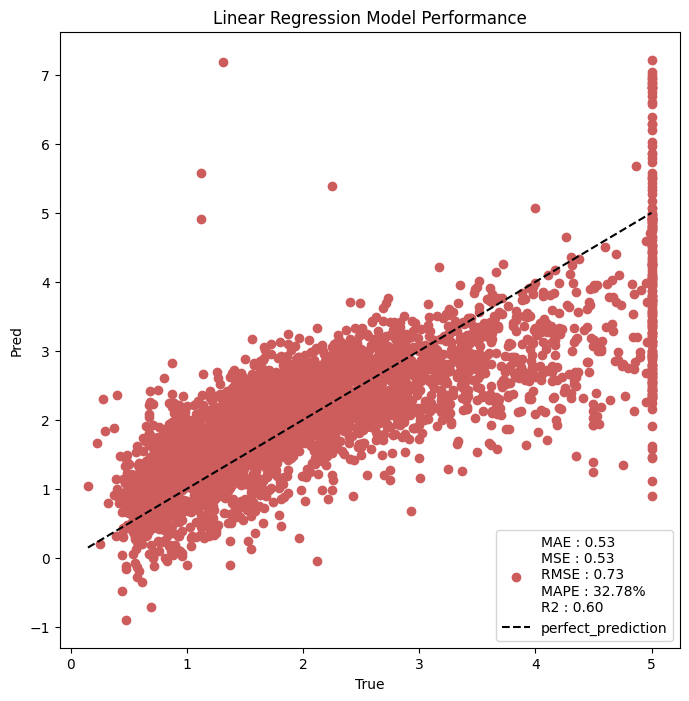

In [ ]:
# 회귀 모델 성능 시각적+정량적으로 확인하기

## step 1. true, pred 값을 기반으로 정량적인 성능 도출
true, pred = pred_info['y_true'], pred_info['y_pred1']
performance = compute_performance_results(y_true=true, y_pred=pred)
mae, mse, rmse, mape, r2 = performance.values()   # dict 값만 출력

## step 2. 시각화를 통해 성능 확인
plt.figure(figsize=(8,8))
vmin, vmax = true.min(), true.max()

### plot에 성능 지표 결과 추가
performance_result = f'MAE : {mae:.2f} \nMSE : {mse:.2f} \nRMSE : {rmse:.2f} \nMAPE : {mape:.2f}% \nR2 : {r2:.2f}'
plt.scatter(true, pred, color='indianred', 
            label=performance_result)      # scatterplot label을 통해서 성능 지표 결과를 plot에 보여줄 수 있음

plt.plot([vmin, vmax], [vmin, vmax], color='k', linestyle='--', label='perfect_prediction')
plt.xlabel('True')
plt.ylabel('Pred')
plt.legend(loc='best')   # 시각화 시 가장 적절한 곳에 범례를 표시하겠다는 의미
plt.title("Linear Regression Model Performance")
plt.show()

##### 회귀 모델 성능 평가 지표 정리

1. **Mean Absolute Error (MAE, 평균 절대 오차)**
    - $MAE=\frac{1}{N} \sum_{i=1}^{N} |y_{i}-\hat{y}_{i}|$
    - *모든 실제 값과 예측 값의 차이 (오차)를 절댓값으로 변환해 평균을 낸 것!*
        - 값이 낮을 수록 좋음
    - 장점: 오차의 크기를 직관적으로 해석 가능 (e.g., 집 값 예측 시, 평균적으로 5만원 정도의 오차가 발생)
    - 단점: 큰 오차가 평균 계산 시 영향을 주는 경우에는 값이 왜곡될 우려가 있음, 절댓값을 사용하기에 예측 값이 실제보다 크거나 작은지 파악 어려움  

<br/>    

2. **Mean Squared Error (MSE, 평균 제곱 오차)**
    - $MSE=\frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^{2}$
    - *각 오차를 제곱한 후 평균을 낸 것!*
        - 값이 낮을 수록 좋음
    - 장점: 예측이 크게 빗나가 큰 오차가 있을 경우 이를 더 강조하여 panelty를 주는 특징, 미분 가능하여 회귀 모델 학습 시에 사용
    - 단점: 실제 값과 단위 통일이 되지 않아 직관적 해석이 어려움, 제곱을 취하기에 예측 값이 실제보다 크거나 작은지 파악 어려움  

<br/>

3. **Root Mean Squared Error (RMSE, 제곱근 평균 제곱 오차)**
    - $RMSE=\sqrt{MSE}=\sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^{2}}$
    - *MSE의 단점을 보완!* 루트를 씌워서 원래 단위로 되돌린 값!
        - 값이 낮을 수록 좋음
    - 장점: 원래 데이터와 단위가 같이 해석이 쉽고, MSE보다 큰 오차에 덜 민감
    - 단점: MAE보다는 큰 오차의 영향력을 더 크게 평가

<br/>

4. **Mean Absolute Percentage Error (MAPE, 평균 절대 백분율 오차)**
    - $MAPE=\frac{100}{N} \sum_{i=1}^{N} |\frac{y_{i}-\hat{y}_{i}}{{y}_{i}}|$
    - *MAE를 비율(%)로 변환한 값!* (오차가 실제 값과 비교하였을 때 몇 %나 차지하는가?)
        - 값이 낮을 수록 좋음
    - 장점: 단위가 %이기에 해석이 직관적 (예: 평균적으로 5% 오차)이고 단위가 다른 데이터셋에 대해서도 모델 성능 비교 가능
    - 단점: 실제 값이 0에 가깝거나 포함된 경우에는 계산이 어려워 사용 불가능


<br/>

5. **R squared ($R^2$, 결정계수)**
    - $R^2=1-\frac{\sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^{2}}{\sum_{i=1}^{N} (y_{i} - \bar{y})^{2}}$, where $\bar{y}$는 $N$개 관측 값의 평균
    - 모델이 *실제 데이터를 얼마나 잘 설명*해주는지 보여주는 지표!
    - 0에서 1 사이의 값이며, 값이 클 수록 (1에 가까울 수록) 좋음
        - 모델이 실제 데이터를 제대로 설명하지 못하는 아주 나쁜 성능을 가지고 있을 때 음수가 나올 수 있음 (모든 예측을 평균 값으로 찍는 것보다도 낮은 성능을 보일 때)
    - 장점: 성능 값이 bounded 되어 있어 상대적 성능 비교가 수월
    - 단점: 데이터가 복잡하거나 이상치가 많은 경우 값이 왜곡될 우려

| 상황 |	추천 지표 |
| --- | ---- |
|오차의 크기를 직관적으로 알고 싶다	 | MAE |
큰 오차를 더 강하게 패널티 주고 싶다	|MSE
큰 오차를 어느 정도 고려하면서 해석이 쉬운 지표를 원한다	|RMSE
오차를 비율(%)로 보고 싶다 (%를 이용해 직관적으로 해석 가능) |	MAPE
모델이 데이터를 얼마나 잘 설명하는지 보고 싶다 (0-1 사이의 값을 이용해 직관적으로 해석 가능)	|$R^2$ Score
